<a href="https://www.kaggle.com/code/gustavolenin/top10-titanic-logistic-regression?scriptVersionId=105174386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Definição do Problema

### Predição de sobreviventes

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, o objetivo é a construção de um modelo preditivo que responda à pergunta: “que tipo de pessoa tem mais probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc).

Inicialmente, foi realizada uma análise exploratória dos dados e, em seguida, a implementação de um modelo preditivo através de técnicas de machine learning, especificamente a regressão logística.

# 2. Extração dos Dados

#### Importação de Bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")

#### Extração dos Dados

In [2]:
# Extração dos Dados de treino
df_train = pd.read_csv('../input/titanic/train.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Extração dos Dados de teste
df_test = pd.read_csv('../input/titanic/test.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Descrição de cada coluna

`PassengerId` - Passenger ID

`Survived`: Survival = 1 / No Survival = 0

`pclass`: Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd

`sex`: Sex

`Age`: Age in years

`sibsp`: # of siblings / spouses aboard the Titanic

`parch`: # of parents / children aboard the Titanic

`ticket`: Ticket number

`fare`: Passenger fare

`cabin`: Cabin number

`embarked`: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# 3. Preparação dos Dados

In [4]:
# Nomes das colunas
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Dimensão do Dataset
print('Número de Linhas = ',df_train.shape[0])
print('Número de Colunas = ',df_train.shape[1])

Número de Linhas =  891
Número de Colunas =  12


In [6]:
# Tipo de Cada Coluna
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
unique_values = []
# Verificando os valores únicos por coluna
[(unique_values.append(str(df_train[coluna].nunique())),print(coluna+' possui '+str(df_train[coluna].nunique())+' valores únicos')) for coluna in df_train.columns];

PassengerId possui 891 valores únicos
Survived possui 2 valores únicos
Pclass possui 3 valores únicos
Name possui 891 valores únicos
Sex possui 2 valores únicos
Age possui 88 valores únicos
SibSp possui 7 valores únicos
Parch possui 7 valores únicos
Ticket possui 681 valores únicos
Fare possui 248 valores únicos
Cabin possui 147 valores únicos
Embarked possui 3 valores únicos


In [8]:
features_bar = []
# Seleção de variáveis para plotagem do gráfico de barras na análise univariada
[(features_bar.append(coluna)) for coluna in df_train.columns if df_train[coluna].nunique() <= 7];

In [9]:
# Verificando a existência de possíveis linhas duplicadas nos dados de treino
df_train.duplicated().sum()

0

In [10]:
# Verificando a existência de possíveis valores ausentes nos dados de treino
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# Verificando a existência de possíveis valores ausentes nos dados de teste
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# 4. Exploração / Visualização dos Dados

#### Estatística Descritiva

In [12]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_train_describe = df_train.describe().T
df_train_describe

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se está para esquerda ou para a direita. Se a assimetria (skew) estiver entre -0,5 e 0,5, os dados são bastante simétricos; Se a assimetria (skew) estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados serão moderadamente distorcidos; Se a assimetria (skew) for menor que -1 ou maior que 1, os dados são altamente distorcidos;

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [13]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df_train.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_train.select_dtypes(exclude=['int64', 'float64'])

In [14]:
df_train_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_train_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_train_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_train_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [15]:
df_train_descritive_statistics = pd.concat([df_train_describe,df_train_skewness,df_train_kurtosis,df_train_median,df_train_intervalo],\
                                     axis=1)
df_train_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000,0.000000,-1.200000,446.0000,890.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,0.478523,-1.775005,0.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,-0.630548,-1.280015,3.0000,2.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,0.389108,0.178274,28.0000,79.5800
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000,3.695352,17.880420,0.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000,2.749117,9.778125,0.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,4.787317,33.398141,14.4542,512.3292


In [16]:
numeric_data = num_attributes.copy()
cat_data     = cat_attributes.copy()

### Análise Univariada

In [17]:
# Create the function to visualize to bar chart
def draw_bar_chart(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.bar(x=df_train[name_feature].value_counts().index,height=df_train[name_feature].value_counts())
        axes.set_title(name_feature,fontsize=15)
        
        indice += 1
        
    plt.show() 
    
    return

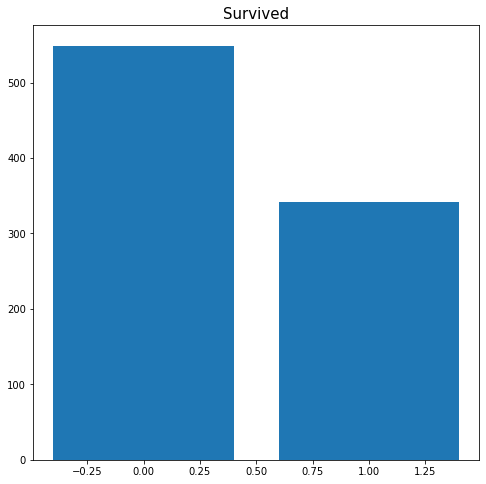

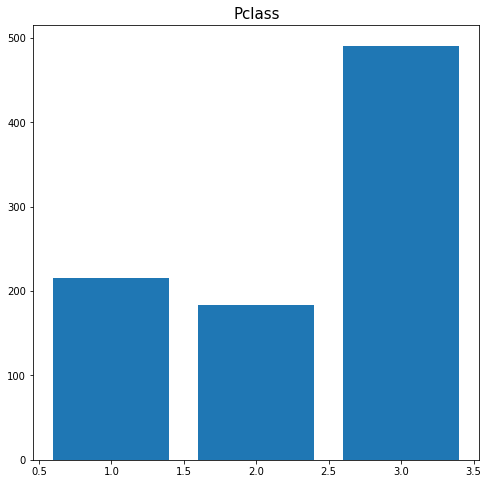

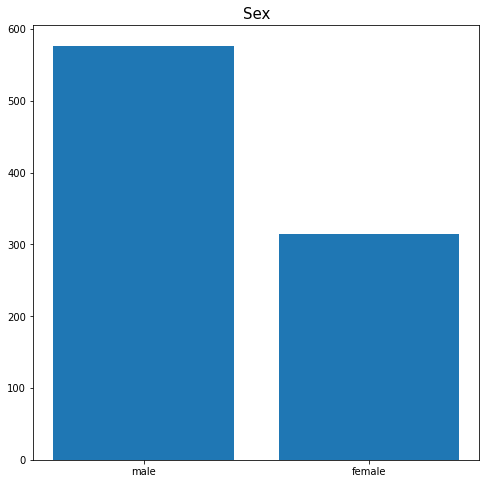

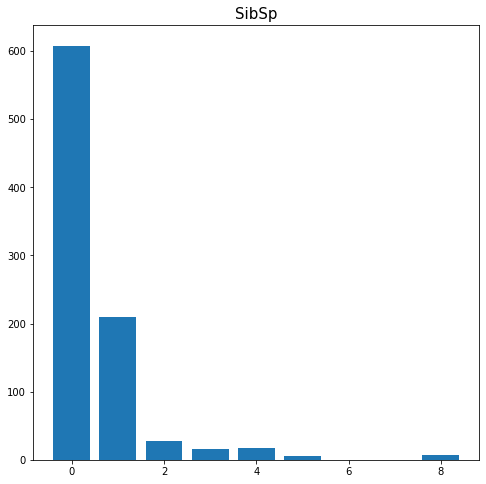

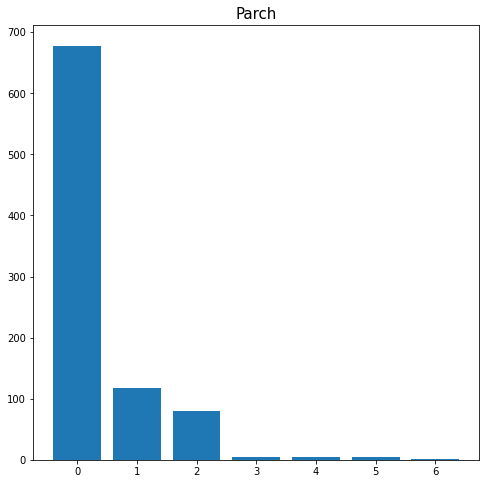

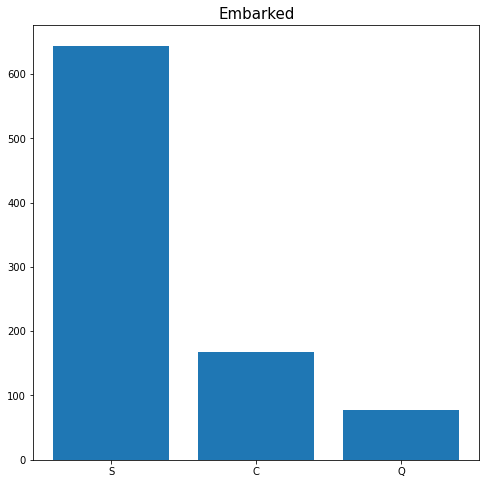

In [18]:
draw_bar_chart(features_bar)

**Insights**: 

**Notamos que a maioria das pessoas:** 
* Não sobreviveram;
* Pertenciam à terceira classe;
* Eram do sexo masculino;
* Eram solteiros;
* Embarcaram em Southampton.

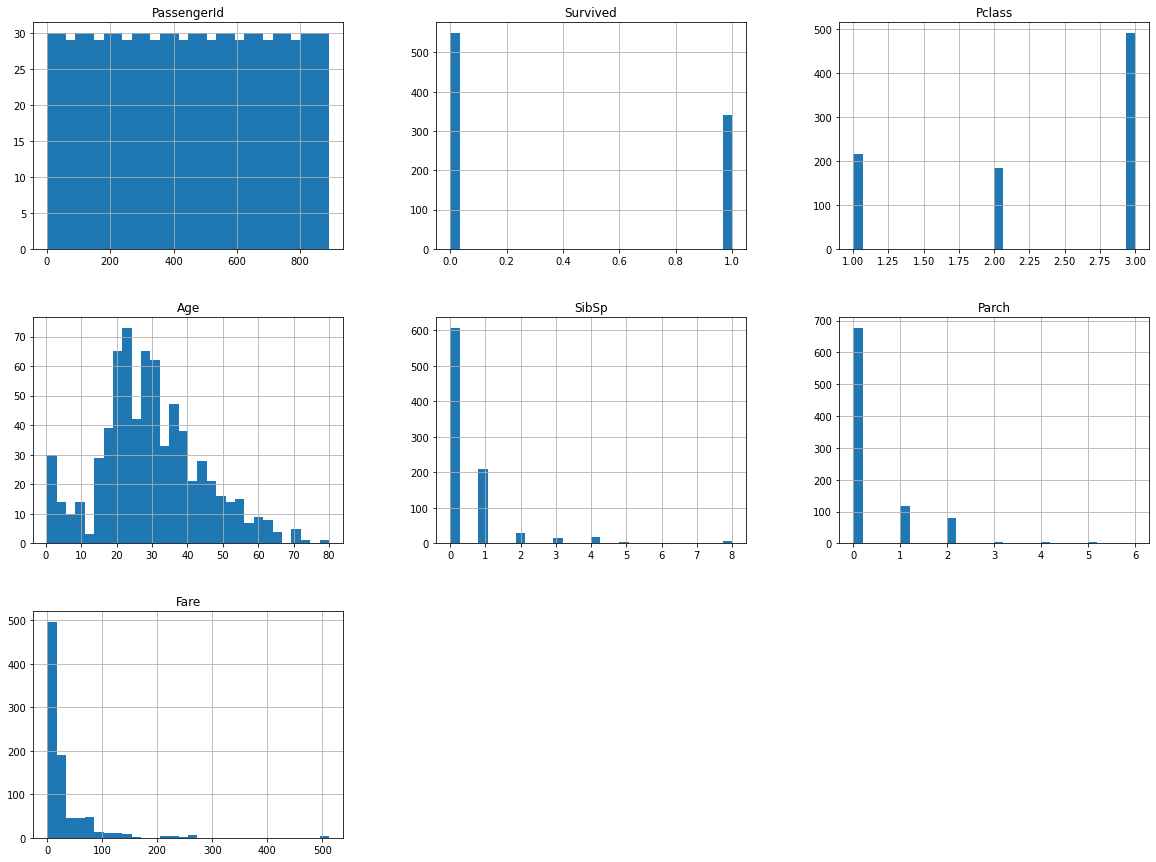

In [19]:
# Plotagem de histogramas 
# Histogramas expressam a distribuição de frequência para variáveis numéricas

_ = df_train.hist(bins=30,figsize=(20,15))

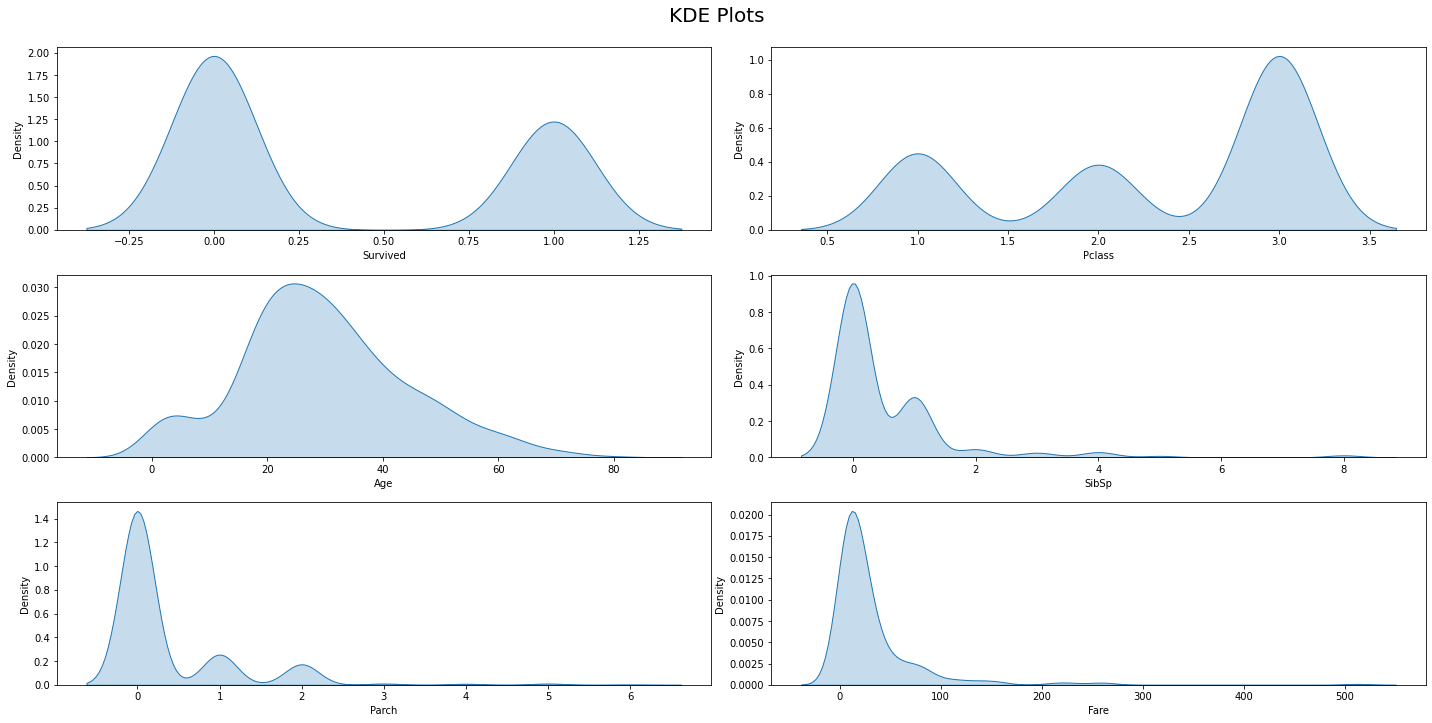

In [20]:
# Função que auxilia na plotagem dos gráficos KDE
def plot_kde(df):
    # Retirar a variável Id de num_attributes
    numerical_columns = num_attributes.columns.drop('PassengerId')
    fig, ax = plt.subplots(int(len(numerical_columns)/2),2, 
                           figsize=(20,10))
    colunas = numerical_columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.kdeplot(data=df[colunas[indice]], ax=ax[j][i],shade=True)
            indice += 1
    fig.suptitle('KDE Plots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return
# KDE plot 
plot_kde(df_train)

**Insights**: 

**Notamos que a maioria das pessoas:**
* Tinham entre 10 e 40 anos;


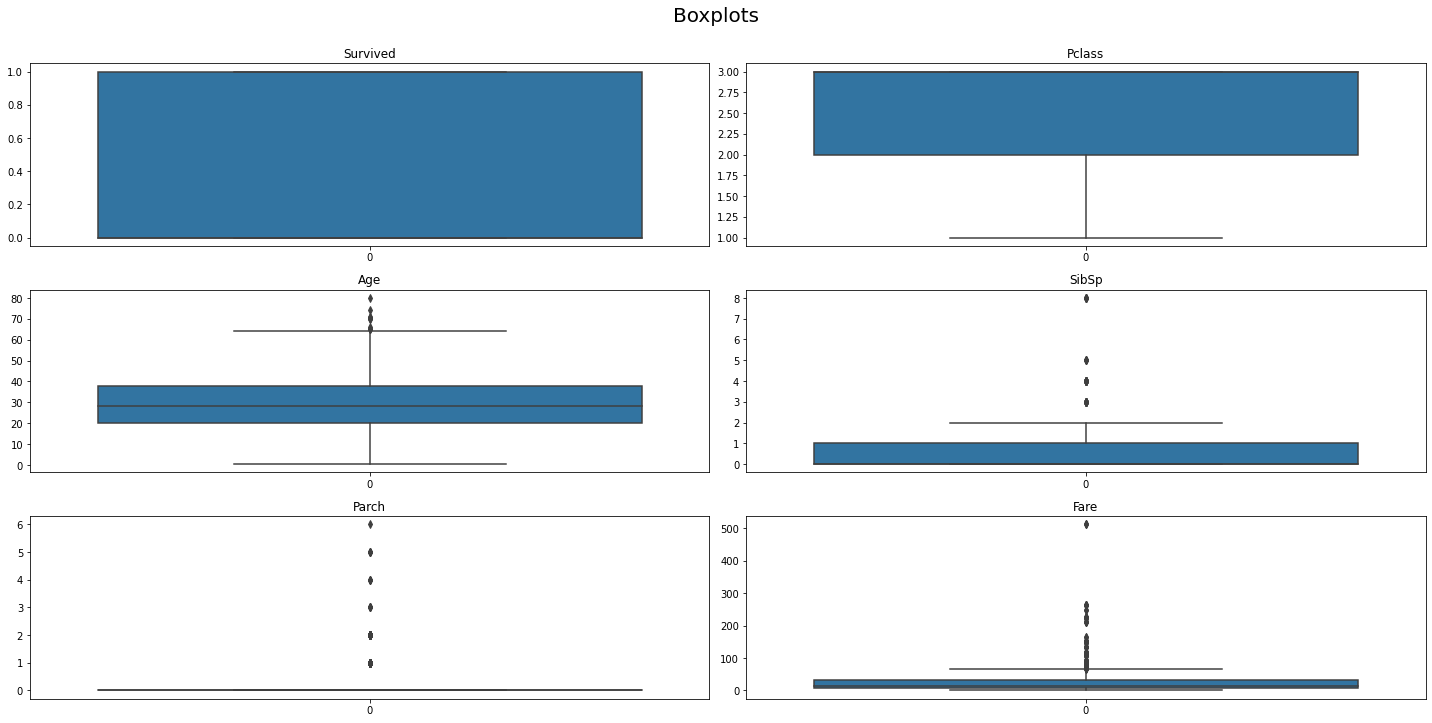

In [21]:
# Afim de visualizar a distribuição dos dados para cada variável e identificar possíveis outliers utilizaremos a seguinte função que auxilia na plotagem dos gráficos boxplot
def plot_boxplot(df):
    # Retirar a variável Id de num_attributes
    numerical_columns = num_attributes.columns.drop('PassengerId')
    fig, ax = plt.subplots(int(len(numerical_columns)/2),2, 
                           figsize=(20,10))
    colunas = numerical_columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i].set_title(colunas[indice])
            ax[j][i] = sns.boxplot(data=df[colunas[indice]], ax=ax[j][i])
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return
# KDE plot 
plot_boxplot(df_train)

### Análise Bivariada

O comando .pairplot gera distribuições univariadas na diagonal e distribuições bivariadas fora das diagonais

A importância desse tipo de gráfico é observar o comportamento das variáveis através de histogramas na diagonal e scatterplots fora da diagonal. Esses scatterplots representam a relação entre os pares de features.

In [22]:
numerical_columns = numeric_data.columns.drop('PassengerId')
# Separando as variáveis numéricas em grupos
pair_columns = numerical_columns

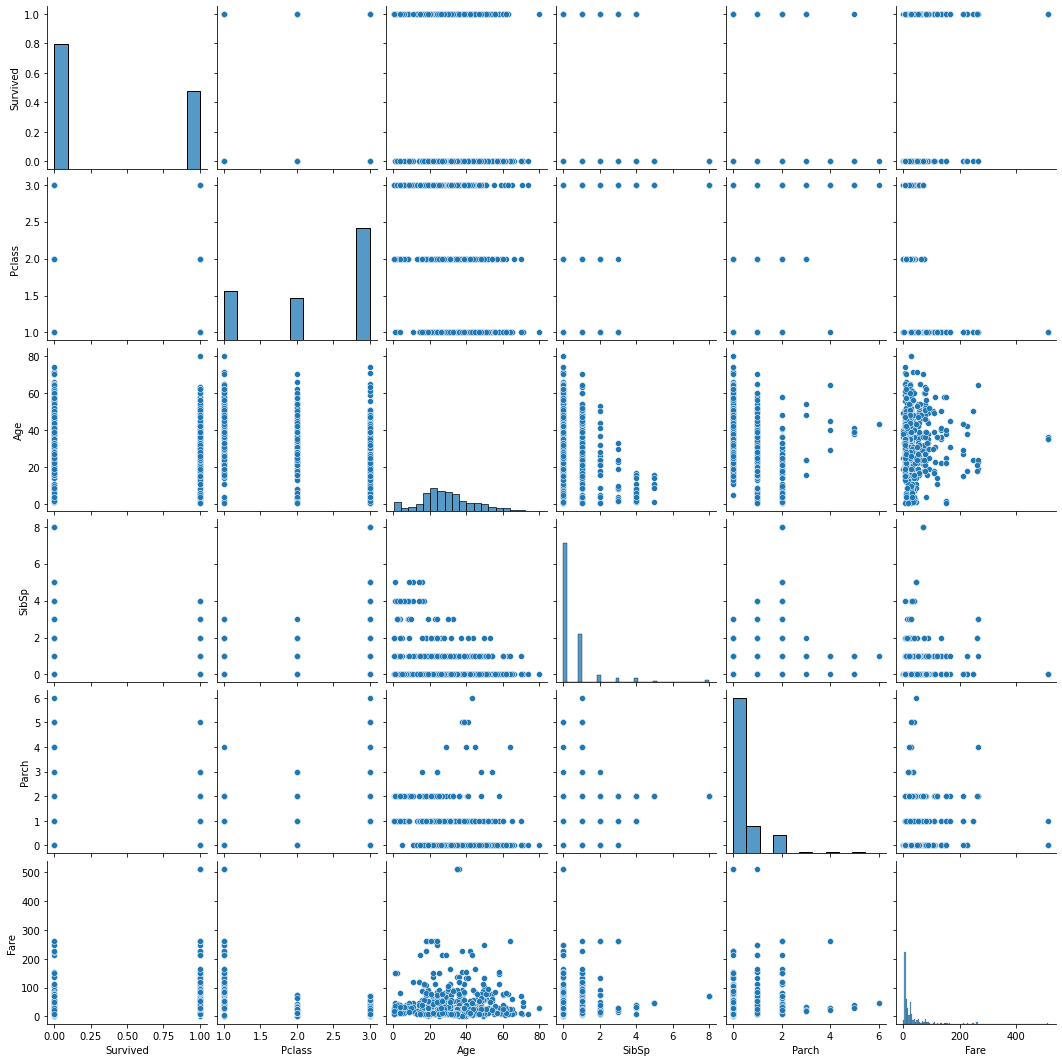

In [23]:
# Plot 1
sns.pairplot(df_train[pair_columns])
plt.show()

In [24]:
# Aplicando coeficiente de correlação de Pearson
df_train_corr = df_train.drop('PassengerId',axis=1).corr()
df_train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


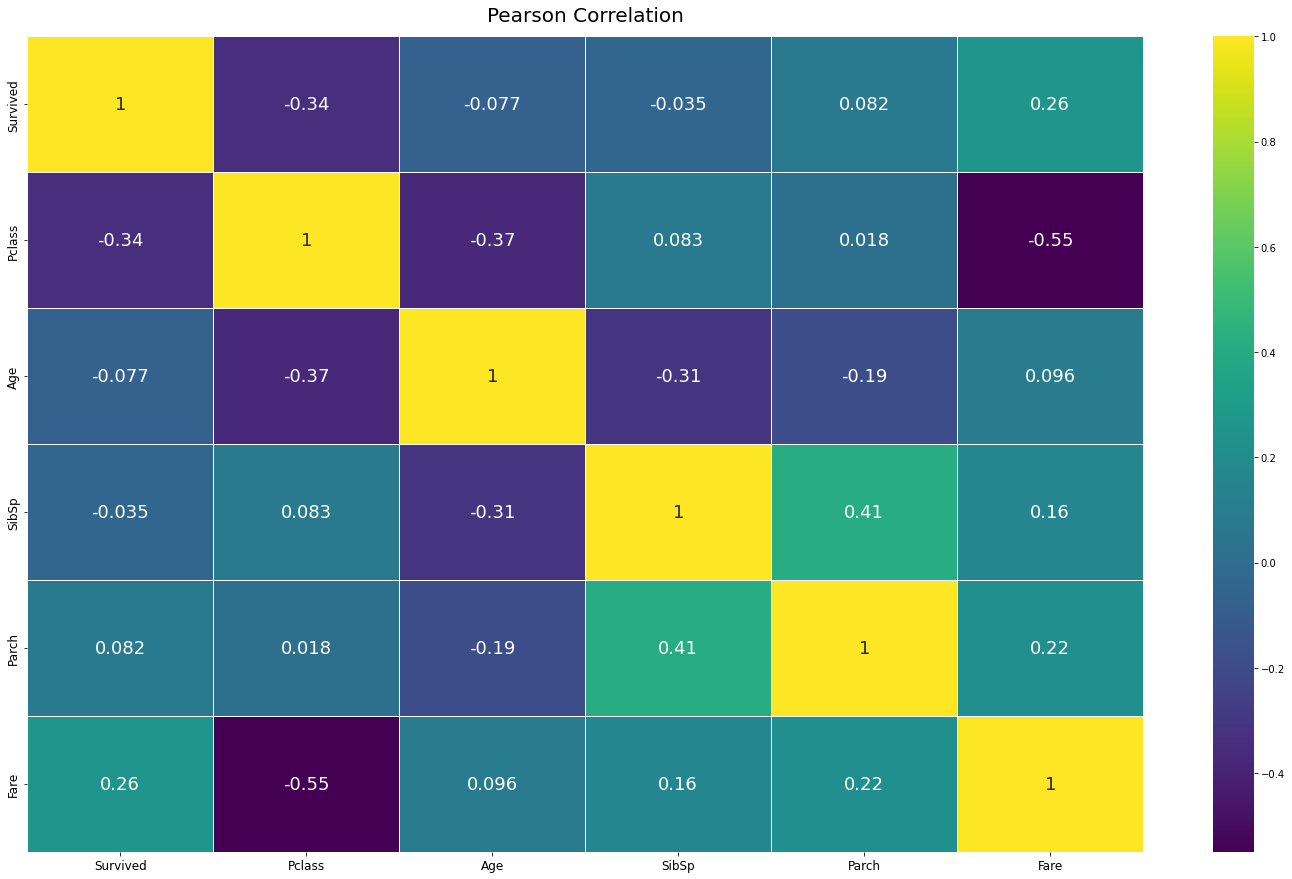

In [25]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson 
_ = plt.figure(figsize = (25,15))
res = sns.heatmap(df_train_corr, vmax = 1, linewidths = 0.7, cmap = 'viridis',annot_kws={"size": 18},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)

O coeficiente de correlação de Pearson nos auxiliar a identificar a intensidade e a direção da relação linear entre duas variáveis. Este coeficiente pode assumir valores entre -1 e 1, o valor em módulo indica a intensidade da relação linear entre as duas variáveis, enquanto o sinal indica a direção. Dessa forma, o sinal positivo indica correlação direta e o sinal negativo indica correlação inversa.

#### Modelo de Machine Learning

Existem muitos dados ausentes na variável Cabin tanto para df_train quanto df_test, dessa forma, optarei pela exclusão desta coluna

In [26]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

A variável Embarked para o conjunto de dados de treino possui apenas 2 dos dados ausentes, dessa forma, irei descartá-los

In [27]:
df_train.dropna(subset=['Embarked'],inplace=True)

In [28]:
# Realizando split dos dados
df_train_target_encoding = df_train.copy()
X = df_train_target_encoding.drop('Survived',axis=1)
y = df_train_target_encoding.Survived
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30,random_state=0)

In [29]:
# Verificando valores ausentes ou nulos no Xtrain
Xtrain.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            129
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
# Verificando valores ausentes ou nulos Xtest
Xtest.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            48
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

Notamos que a variável Age possui dados ausentes, para não descartar essa quantidade de dados, utilizarei a mediana como substituição para estes valores ausentes

In [31]:
Xtrain.Age.fillna(Xtrain.Age.median(),inplace=True);
Xtest.Age.fillna(Xtrain.Age.median(),inplace=True);
df_test.Age.fillna(Xtrain.Age.median(),inplace=True);

A variável Fare para o conjunto de dados de teste possui apenas 1 dos dado ausente, entretanto, em virtude do shape do arquivo de saída, não podemos descartar esse dado, portanto, iremos substituir pela mediana

In [32]:
df_test.Fare.fillna(Xtrain.Fare.median(),inplace=True);

In [33]:
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

In [34]:
# Definindo as variáveis numéricas e categóricas
numeric_data = df_train.select_dtypes(include=['int64','float64'])
cat_data     = df_train.select_dtypes(include='object')

In [35]:
encoder = TargetEncoder(cols=cat_data.columns)
Xtrain = encoder.fit_transform(df_target_encoding_train.drop('Survived',axis=1),df_target_encoding_train.Survived);
Xtest  = encoder.transform(df_target_encoding_test.drop('Survived',axis=1),df_target_encoding_test.Survived);
ytrain = df_target_encoding_train.Survived
ytest = df_target_encoding_test.Survived

### Regressão Logística

In [36]:
param_grid = {'C': np.arange(0.01,2,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain,ytrain)
predlogistic = search_logistic.predict(Xtest)

#### Avaliação do modelo no conjunto de dados de treino

In [37]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.7752808988764045

In [38]:
# Matriz de confusão
matriz_confusao = confusion_matrix(ytest, predlogistic)
pd.DataFrame(matriz_confusao,index=['Real negativo','Real Verdadeiro'],columns=['Previsto Negativo','Previsto Positivo'])

,Previsto Negativo,Previsto Positivo
Real negativo,133,24
Real Verdadeiro,36,74


**Considerações:**
* 78,70% das pessoas que o modelo previu que morreriam de fato morreram;
* 75,51% das pessoas que o modelo previu que sobreviveriam de fato sobreviveram;
* 85,81% das pessoas que morreram foram previstas pelo modelo;
* 67,27% das pessoas que sobreviveram foram previstas pelo modelo.

In [39]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.76      0.67      0.71       110

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



**Interpretação**

* Precision mede a capacidade do modelo de não confundir uma instância negativa com uma positiva, ou seja, se a instância é Previsto Positivo, o precision é calculado da seguinte forma: Real Verdadeiro/(Real Verdadeiro + Real Negativo);
* Recall (True Positive Rate) mede a capacidade do modelo de encontrar todos as instâncias positivas, exemplo: qual percentual de pessoas que de fato morreram que o modelo conseguiu encontrar?
* F1-Score corresponde a uma média harmônica entre esses dois parâmetros.

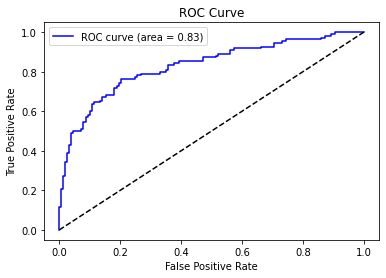

In [40]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Considerações:

A curva ROC é influenciado pelo TPR (True Positive Rate ou Recall ou Sensitity) e pelo FPR (False Positive Rate ou Specificity).

A AUC (Area Under the Curve) é parâmetro que varia de 0.5 a 1 e nos diz o quanto o modelo é capaz de distinguir as duas classes (TPR) e (FPR). 

# Aplicação do modelo no conjunto de dados de teste

In [41]:
# Definindo as variáveis numéricas e categóricas
numeric_data_test = df_test.select_dtypes(include=['int64','float64'])
cat_data_test     = df_test.select_dtypes(include='object')

In [42]:
df_test_final = encoder.transform(df_test);
predlogistic_test = search_logistic.predict(df_test_final)

In [43]:
my_submission = pd.DataFrame({'PassengerId': df_test_final.PassengerId, 'Survived': predlogistic_test})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)